# Singular Value Decomposition Linear Regression

***
### `class SingularValueDecompositionLinearRegression(fitIntercept: true)`
***

## Parameters:
  #### `fitIntercept`: *Bool, optional, default `true`*
  Whether to calculate the intercept for this model. If set to `false`, no intercept will be used in calculations.

## Attributes: 
  #### `weights`: *Tensor, shape [feature count, target count]*
  Estimated intercepts and coefficients for the linear regression problem. If `fitIntercept: true` first row in tensor represent intercept and remaining rows represent coefficients, else tensor matrix represent the coefficients for the linear regression.

***

## Methods

***

  ### `fit(data: Tensor, labels: Tensor)`:  Fit a linear model.

  ### Parameters:

  #### `data`: *Tensor, shape [sample count, feature count]*
  Training data.
  #### `labels`: *Tensor, shape [sample count, target count]*  
  Target data.

  ***

  ### `prediction(for: Tensor)`: Prediction using a linear model.

  ### Parameters:
  #### `for`: *Tensor, shape [sample count, feature count]*
  Sample data.

  ### Returns:
  Returns predicted values.  

  ***
  ### `score(data: Tensor, labels: Tensor)`: Returns the coefficient of determination $R^2$ for the prediction.

  ### Parameters:
  #### `data`: *Tensor, shape [sample count, feature count]*
  Test sample data.
  #### `labels`: *Tensor, shape [sample count, target count]*  
  True value for test sample data.

  ### Returns:
  Returns the coefficient of determination $R^2$
  
***




# Example

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1GLczuSuDkL6YvCTWCMc4Woap_ZmIxofS"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/param087/swiftML/blob/master/Notebooks/Singular%20Value%20Decomposition%20Linear%20Regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Install the swiftML package from GitHub.

In [1]:
%install '.package(url: "https://github.com/param087/swiftML", from: "0.0.2")' swiftML

Installing packages:
	.package(url: "https://github.com/param087/swiftML", from: "0.0.2")
		swiftML
With SwiftPM flags: []
Working in: /tmp/tmp29sd7bnt/swift-install
Fetching https://github.com/param087/swiftML
Completed resolution in 2.95s
Cloning https://github.com/param087/swiftML
Resolving https://github.com/param087/swiftML at 0.0.2
Compile Swift Module 'swiftML' (16 sources)
/tmp/tmp29sd7bnt/swift-install/package/.build/checkouts/swiftML-1801b701/Sources/swiftML/KNeighborsClassifier.swift:106:13: warning: variable 'indices' was written to, but never read
        var indices: Tensor<Int32>
            ^

/tmp/tmp29sd7bnt/swift-install/package/.build/checkouts/swiftML-1801b701/Sources/swiftML/PCA.swift:158:13: warning: variable 'u' was written to, but never read
        var u: Tensor<Double>
            ^
/tmp/tmp29sd7bnt/swift-install/package/.build/checkouts/swiftML-1801b701/Sources/swiftML/RandomForest.swift:54:13: warning: variable 'outOfBootData' was written to, but never read

## Import Swift packages

In [2]:
import TensorFlow
import swiftML

This example uses the only the first feature of the `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

## Import Python modules

In [3]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

import Python

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")

let datasets = Python.import("sklearn.datasets")

## Load and split dataset

In [4]:
// Load the diabetes dataset
let diabetes = datasets.load_diabetes()

// Use only one feature.
let diabetesData = Tensor<Float>(numpy: np.array(diabetes.data, dtype: np.float32))!
let data = diabetesData.slice(lowerBounds: [0, 2], upperBounds: [diabetesData.shape[0], 3])

// Split the data into training/testing sets.
let trainData = data.slice(lowerBounds: [0, 0], upperBounds: [(data.shape[0] - 20), 1])
let testData = data.slice(lowerBounds: [(data.shape[0] - 20), 0], upperBounds: [data.shape[0], 1])

var labels = Tensor<Float>(numpy: np.array(diabetes.target, dtype: np.float32))!
labels = labels.reshaped(to: [labels.shape[0], 1])

// Split the targets/labels into training/testing sets.
let trainLabels = labels.slice(lowerBounds: [0, 0], upperBounds: [(data.shape[0] - 20), 1])
let testLabels = labels.slice(lowerBounds: [(data.shape[0] - 20), 0], upperBounds: [data.shape[0], 1])


In [5]:
let model = SingularValueDecompositionLinearRegression(fitIntercept: true)

## Fit a linear model

In [6]:
model.fit(data: trainData, labels: trainLabels)

In [7]:
model.score(data: trainData, labels: trainLabels)

0.33513123


In [8]:
model.score(data: testData, labels: testLabels)

0.47257543


In [9]:
model.weights

[[152.91887],
 [938.23773]]


In [10]:
let predictedTestLabels = model.prediction(for: testData)
let x = testData.makeNumpyArray()
let y = testLabels.makeNumpyArray()
let yPredicted = predictedTestLabels.makeNumpyArray()

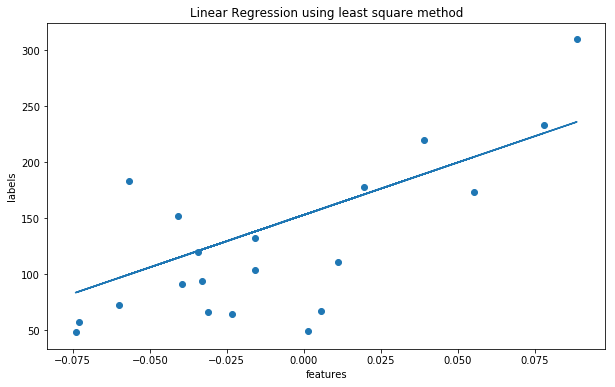

None


In [11]:
plt.figure(figsize: [10, 6])

plt.plot(x, yPredicted)
plt.scatter(x, y)

plt.xlabel("features")
plt.ylabel("labels")
plt.title("Linear Regression using least square method")

plt.show()